# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observable Trends from this analysis:
1.	Temperature ranges are higher around the tropics or equator since there is more sunshine year-round. Temperatures drop with movement towards the poles of both Northern and Southern hemispheres. 
2.	It is colder in the Northern hemisphere compared to the tropics and Southern hemisphere. May be due to longer distance from the sun with the earth’s tilt. 
3.	Latitude has no significant relationship with cloudiness and wind speed in both hemispheres.  There is a stronger relationship between latitude and humidity in the Northern hemisphere which could issue from low temperatures and higher condensation. 
4.	A higher proportion of the cities generated from the data are in the Northern hemisphere which may relate to that domain being preferred for human habitation, especially since it appears to have more landmass.

In [566]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pyowm 
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [567]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"There are {len(cities)} cities!")

There are 621 cities!


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [568]:
# Setting up query url and units to perform API calls
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Setting up API call parameters
c = 0 
Set = 1
weather_json_list = []

print(f"\nBeginning Data Retrieval\n{'-'*30}")

# Creating a FOR loop to obtain cities information
for single in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q=" + single        
    #if c < 2: 
    print(f"Processing Record {c} of Set {Set} | {single}")
    weather_response = requests.get(query_url)
    if weather_response.status_code == 200:
        weather_json = weather_response.json()
        weather_json_list.append(weather_json)
            #print(weather_response.status_code)
    else:
        print('City not found. Skipping...')

        c += 1
    if c == 50:
        c = 0
        Set += 1



Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 1 | port augusta
Processing Record 0 of Set 1 | ushuaia
Processing Record 0 of Set 1 | albany
Processing Record 0 of Set 1 | yellowknife
Processing Record 0 of Set 1 | juneau
Processing Record 0 of Set 1 | barbar
City not found. Skipping...
Processing Record 1 of Set 1 | antigonish
Processing Record 1 of Set 1 | fortuna
Processing Record 1 of Set 1 | kodiak
Processing Record 1 of Set 1 | atuona
Processing Record 1 of Set 1 | butaritari
Processing Record 1 of Set 1 | laguna
Processing Record 1 of Set 1 | mar del plata
Processing Record 1 of Set 1 | bluff
Processing Record 1 of Set 1 | andapa
Processing Record 1 of Set 1 | upernavik
Processing Record 1 of Set 1 | ribeira grande
Processing Record 1 of Set 1 | meyungs
City not found. Skipping...
Processing Record 2 of Set 1 | colombo
Processing Record 2 of Set 1 | hobart
Processing Record 2 of Set 1 | east london
Processing Record 2 of Set 1 | batagay
Proce

Processing Record 19 of Set 1 | nadym
Processing Record 19 of Set 1 | yarmouth
Processing Record 19 of Set 1 | salmo
Processing Record 19 of Set 1 | nizhniy kuranakh
Processing Record 19 of Set 1 | maldonado
Processing Record 19 of Set 1 | olafsvik
Processing Record 19 of Set 1 | katsuura
Processing Record 19 of Set 1 | labuhan
Processing Record 19 of Set 1 | georgetown
Processing Record 19 of Set 1 | bonnyville
Processing Record 19 of Set 1 | namibe
Processing Record 19 of Set 1 | roebourne
Processing Record 19 of Set 1 | yulara
Processing Record 19 of Set 1 | victoria
Processing Record 19 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | dengzhou
Processing Record 19 of Set 1 | stornoway
Processing Record 19 of Set 1 | sechura
Processing Record 19 of Set 1 | tiksi
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | husavik
Processing Record 20 of Set 1 | ilebo
Processing Record 20 of Set 1 | princeton
Processing Record 20 of Set 

Processing Record 30 of Set 1 | umm lajj
Processing Record 30 of Set 1 | ganzhou
Processing Record 30 of Set 1 | zlitan
Processing Record 30 of Set 1 | darhan
Processing Record 30 of Set 1 | beringovskiy
Processing Record 30 of Set 1 | banjar
Processing Record 30 of Set 1 | flinders
Processing Record 30 of Set 1 | krasnovishersk
Processing Record 30 of Set 1 | atar
Processing Record 30 of Set 1 | temaraia
City not found. Skipping...
Processing Record 31 of Set 1 | qasigiannguit
Processing Record 31 of Set 1 | gamba
Processing Record 31 of Set 1 | digby
Processing Record 31 of Set 1 | saldanha
Processing Record 31 of Set 1 | sao joao do paraiso
Processing Record 31 of Set 1 | horice
Processing Record 31 of Set 1 | haines junction
Processing Record 31 of Set 1 | lakeway
Processing Record 31 of Set 1 | kahului
Processing Record 31 of Set 1 | constitucion
Processing Record 31 of Set 1 | okha
Processing Record 31 of Set 1 | porto seguro
Processing Record 31 of Set 1 | long beach
Processing 

Processing Record 40 of Set 1 | manjacaze
Processing Record 40 of Set 1 | zhaotong
Processing Record 40 of Set 1 | jashpurnagar
Processing Record 40 of Set 1 | hay river
Processing Record 40 of Set 1 | miraflores
Processing Record 40 of Set 1 | omutinskoye
City not found. Skipping...
Processing Record 41 of Set 1 | barstow
Processing Record 41 of Set 1 | bam
Processing Record 41 of Set 1 | odienne
Processing Record 41 of Set 1 | champerico
Processing Record 41 of Set 1 | igarka
Processing Record 41 of Set 1 | bad doberan
Processing Record 41 of Set 1 | nouadhibou
Processing Record 41 of Set 1 | borba
Processing Record 41 of Set 1 | kyzyl-suu
Processing Record 41 of Set 1 | boende
Processing Record 41 of Set 1 | kutoarjo
Processing Record 41 of Set 1 | san quintin
Processing Record 41 of Set 1 | college
Processing Record 41 of Set 1 | khujand
Processing Record 41 of Set 1 | homer
Processing Record 41 of Set 1 | cabra
Processing Record 41 of Set 1 | skegness
Processing Record 41 of Set 1

In [569]:
len(weather_json_list)

579

In [570]:
weather_json_list[0]

{'coord': {'lon': 137.77, 'lat': -32.5},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 63.82,
  'feels_like': 56.79,
  'temp_min': 63,
  'temp_max': 66.2,
  'pressure': 1011,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 170},
 'clouds': {'all': 90},
 'dt': 1608127912,
 'sys': {'type': 1,
  'id': 9613,
  'country': 'AU',
  'sunrise': 1608147402,
  'sunset': 1608198804},
 'timezone': 37800,
 'id': 2063056,
 'name': 'Port Augusta',
 'cod': 200}

In [558]:
# Doublechecking query url for alignment
query_url 

'https://api.openweathermap.org/data/2.5/weather?appid=98efd05784ec09eac725db00376fcdd4&units=imperial&q=scottsbluff'

In [571]:
# Identifying output json file response keys 
weather_json_list[0].keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [572]:
# Columns for dataframe headers or indexes
df_columns = ['City','Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']

# Setting up empty dataframe to obtain 
weather_json_df = pd.DataFrame([], columns=df_columns)

# Setting up FOR loop to convert json response list to dataframe
for city in weather_json_list:
    name = city['name']
    Lat = city['coord']['lat']
    Long = city['coord']['lon']
    Max_Temp = city['main']['temp_max']
    Humidity = city['main']['humidity']
    Cloudiness = city['clouds']['all']
    Wind_Speed = city['wind']['speed']
    Country = city['sys']['country']
    Date = city['dt']
    New_data = [name, Lat, Long, Max_Temp, Humidity, Cloudiness, Wind_Speed, Country, Date]
    weather_json_df.loc[len(weather_json_df)] = New_data

# Outputting first 5 rows of dataframe
weather_json_df.head()  

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Augusta,-32.50,137.77,66.20,77,90,16.11,AU,1608127912
1,Ushuaia,-54.80,-68.30,46.40,70,75,20.80,AR,1608127754
2,Albany,42.60,-73.97,15.01,72,75,8.05,US,1608127711
3,Yellowknife,62.46,-114.35,-40.00,72,20,8.05,CA,1608127913
4,Juneau,58.30,-134.42,30.99,92,90,6.91,US,1608127913


In [573]:
# Summary outlook of dataframe
weather_json_df.describe()

,Lat,Lng,Max Temp,Wind Speed
count,579.000000,579.000000,579.000000,579.000000
mean,17.347979,14.582625,54.003886,8.412159
std,33.200265,90.393212,31.115253,5.986651
min,-54.800000,-175.200000,-44.190000,0.220000
25%,-11.915000,-64.320000,32.000000,4.230000
50%,20.520000,20.040000,64.000000,6.930000
75%,44.820000,94.790000,78.935000,11.400000
max,78.220000,179.320000,100.400000,46.080000


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [575]:
# Exporting city data into a csv file
weather_json_df.to_csv("../Output_data/weather_json.csv",encoding="utf-8", index=False, header=True)

In [576]:
# Displaying the dataframe
weather_json_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Augusta,-32.50,137.77,66.20,77,90,16.11,AU,1608127912
1,Ushuaia,-54.80,-68.30,46.40,70,75,20.80,AR,1608127754
2,Albany,42.60,-73.97,15.01,72,75,8.05,US,1608127711
3,Yellowknife,62.46,-114.35,-40.00,72,20,8.05,CA,1608127913
4,Juneau,58.30,-134.42,30.99,92,90,6.91,US,1608127913
...,...,...,...,...,...,...,...,...,...
574,Chingirlau,51.09,54.08,23.04,95,100,13.00,KZ,1608128070
575,Pestravka,52.41,49.96,21.87,97,100,7.92,RU,1608128070
576,Ketchikan,55.34,-131.65,42.80,87,90,12.75,US,1608128070
577,Porlamar,10.96,-63.85,80.60,83,51,10.29,VE,1608128070


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [577]:
# Checking for cities with humidity > 100%
hum_lsd_zr_df = len(weather_json_df.loc[weather_json_df['Humidity'] > 100])
hum_lsd_zr_df

# NO HUMIDITY DATA ABOVE 100%

0

In [17]:
#  Get the indices of cities that have humidity over 100%. (THERE WERE NONE)

# "NO CITY WITH HUMIDITY OVER 100%"

# Also, since no Humidity outliers, I kept my dataframe as "clean_city_data"

Int64Index([], dtype='int64')

In [578]:
# Completing dataframe cleanup
clean_city_data = weather_json_df.dropna(how='any')
clean_city_data.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [582]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Displaying clean city data
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Augusta,-32.50,137.77,66.20,77,90,16.11,AU,1608127912
1,Ushuaia,-54.80,-68.30,46.40,70,75,20.80,AR,1608127754
2,Albany,42.60,-73.97,15.01,72,75,8.05,US,1608127711
3,Yellowknife,62.46,-114.35,-40.00,72,20,8.05,CA,1608127913
4,Juneau,58.30,-134.42,30.99,92,90,6.91,US,1608127913
...,...,...,...,...,...,...,...,...,...
574,Chingirlau,51.09,54.08,23.04,95,100,13.00,KZ,1608128070
575,Pestravka,52.41,49.96,21.87,97,100,7.92,RU,1608128070
576,Ketchikan,55.34,-131.65,42.80,87,90,12.75,US,1608128070
577,Porlamar,10.96,-63.85,80.60,83,51,10.29,VE,1608128070


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

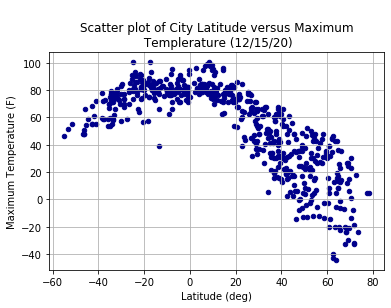

In [597]:
# Plotting Latitude vs Temperature Scatter Plot
fig, ax = plt.subplots()
clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp', ax=ax, color='darkblue', alpha=1, marker='o')
#clean_city_data.plot.scatter(x='Lat', y='Max Temp', ax=ax)
plt.xlabel('Latitude (deg)')
plt.ylabel('Maximum Temperature (F)')
plt.title('\nScatter plot of City Latitude versus Maximum\n Templerature (12/15/20)')
ax.grid()
plt.savefig("../output_data/LatitudevsMax_Temp.png")

Comment on Latitude vs Temperature Scatter Plot above:
From the above plot, we see that temperatures are higher around the equator and drop as measurements move towards the poles. The Northern hemisphere seems to have colder temperatures than the Southern hemisphere.

## Latitude vs. Humidity Plot

Latitude vs Humidity plot: Humidity levels around the equator are high. Above latitude 20deg, humidity presents higher especially at the top quarter of Northern hemisphere.

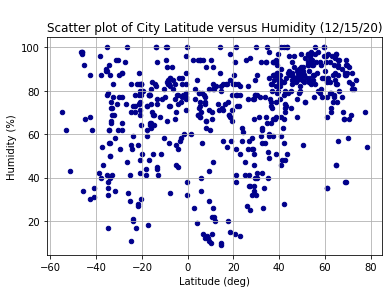

In [599]:
fig, ax = plt.subplots()
clean_city_data.plot(kind='scatter', x='Lat', y='Humidity', ax=ax, color='darkblue', alpha=1, marker='o')
#clean_city_data.plot.scatter(x='Lat', y='Max Temp', ax=ax)
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')
plt.title('\nScatter plot of City Latitude versus Humidity (12/15/20)')
ax.grid()
plt.savefig("../output_data/LatitudevsHumidity.png")

## Latitude vs. Cloudiness Plot

Latitude vs Cloudiness plot: Quite sparse data, however higher comparative cloudiness in Northern hemisphere or higher latitudes. Significant cloudiness though around equator.

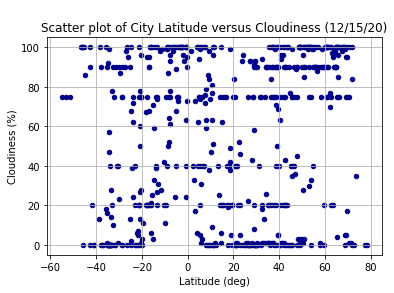

In [600]:
fig, ax = plt.subplots()
clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness', ax=ax, color='darkblue', alpha=1, marker='o')
#clean_city_data.plot.scatter(x='Lat', y='Max Temp', ax=ax)
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')
plt.title('\nScatter plot of City Latitude versus Cloudiness (12/15/20)')
ax.grid()
plt.savefig("../output_data/LatitudevsCloudiness.png")

## Latitude vs. Wind Speed Plot

Latitude vs Wind Speed: It appears low windspeed evenly distributed up to 10 degrees off the poles of both hemispheres. Significant concentration around latitude 40deg North.

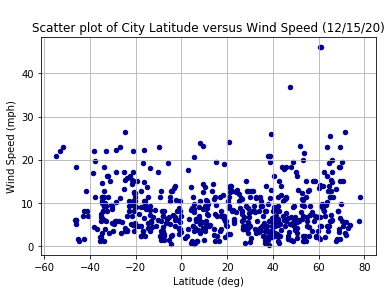

In [601]:
fig, ax = plt.subplots()
clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed', ax=ax, color='darkblue', alpha=1, marker='o')
#clean_city_data.plot.scatter(x='Lat', y='Max Temp', ax=ax)
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')
plt.title('\nScatter plot of City Latitude versus Wind Speed (12/15/20)')
ax.grid()
plt.savefig("../output_data/LatitudevsWind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression (Latitude vs Max Temp): Plot shows good correlation between latitude and max temperature; temperatures fall as we drift towards the North pole, and are higher at the equator. Follows that the equator region is largely sun-bathed. The correlation between both variables is quite strong.

R-Squared: 0.7160774330939366


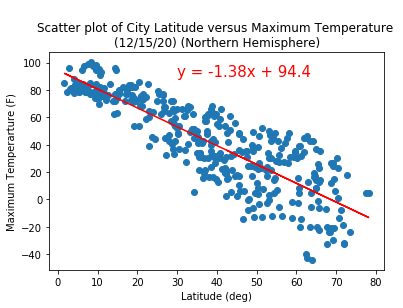

<Figure size 432x288 with 0 Axes>

In [603]:
## Convert to floats and store Latitude and Max Temp as x and y values respectively
NorLat_temp_plt_df = clean_city_data.loc[clean_city_data['Lat'] >= 0,['Lat','Max Temp']]
x_values = NorLat_temp_plt_df ['Lat'].astype('float')
y_values = NorLat_temp_plt_df ['Max Temp'].astype('float')


# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,90),fontsize=15,color="red")

# Plot Title
plt.title('\nScatter plot of City Latitude versus Maximum Temperature \n(12/15/20) (Northern Hemisphere)')

# Label plot
plt.xlabel('Latitude (deg)')
plt.ylabel('Maximum Temperarture (F)')

# Print r square value
print(f"R-Squared: {rvalue**2}")

# Show plot
plt.show()

# Output png
plt.savefig("../output_data/LatitudevsMaxTemp_North.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Souther Hemisphere (Latitude vs Max Temperature): Temperatures drop as we drift towards the south pole. Higher temperatures around equator which is largely sun-bathed year-round. The R-Squared data shows reasonable correlation between both variables.

R-Squared: 0.3273350975845069


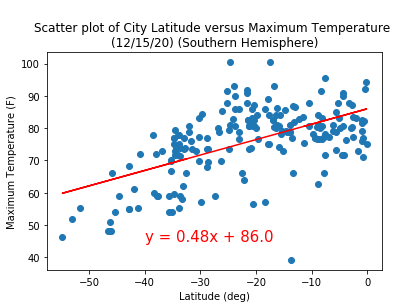

<Figure size 432x288 with 0 Axes>

In [604]:
## Convert to floats and store Latitude and Max Temp as x and y values
SouLat_Temp_plt_df = clean_city_data.loc[clean_city_data['Lat'] < 0,['Lat','Max Temp']]
x_values = SouLat_Temp_plt_df['Lat'].astype('float')
y_values = SouLat_Temp_plt_df['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot Title
plt.title('\nScatter plot of City Latitude versus Maximum Temperature \n(12/15/20) (Southern Hemisphere)')

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (deg)')
plt.ylabel('Maximum Temperature (F)')

# Print r square value
print(f"R-Squared: {rvalue**2}")

# Show plot
plt.show()

# Output png
plt.savefig("../output_data/LatitudevsMax_Temp_South.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Northern Hemisphere (Latitude vs Humidity): Humidity increasing as drift towards north pole, certainly higher concentration around upper quartile of Northern hemisphere. Constant humidity around equator showing consequent from higher temperatures. R-Squared value shows reasonable correlation between both variables measured.

R-Squared: 0.14641770746431587


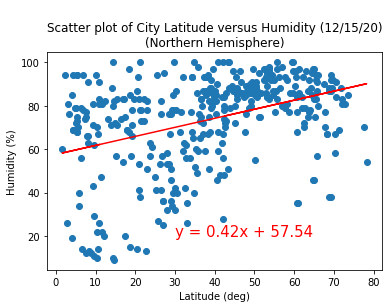

<Figure size 432x288 with 0 Axes>

In [609]:
## Convert to floats and store Latitude and Humidity as x and y values
NorLat_Hum_plt_df = clean_city_data.loc[clean_city_data['Lat'] >= 0,['Lat','Humidity']]
x_values = NorLat_Hum_plt_df['Lat'].astype('float')
y_values = NorLat_Hum_plt_df ['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")

# Plot Title
plt.title('\nScatter plot of City Latitude versus Humidity (12/15/20)\n(Northern Hemisphere)')

# Label plot
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R-Squared: {rvalue**2}")

# Show plot
plt.show()

# Output png
plt.savefig("../output_data/LatitudevsHumidity_North.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Southern Hemisphere (Latitude vs Humidity): Not very significant correlation between both variables measured i.e. latitude and humidity, however data shows higher humidity around tropics which does issue from higher relative temperatures.

R-Squared: 0.021604796288125026


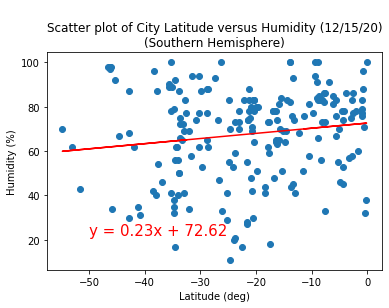

<Figure size 432x288 with 0 Axes>

In [611]:
## Convert to floats and store Latitude and Humidity as x and y values
SouLat_Hum_plt_df = clean_city_data.loc[clean_city_data['Lat'] < 0,['Lat','Humidity']]
x_values = SouLat_Hum_plt_df['Lat'].astype('float')
y_values = SouLat_Hum_plt_df ['Humidity'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

# Plot Title
plt.title('\nScatter plot of City Latitude versus Humidity (12/15/20)\n(Southern Hemisphere)')

# Label plot
plt.xlabel('Latitude (deg)')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R-Squared: {rvalue**2}")

# Show plot
plt.show()

# Output png
plt.savefig("../output_data/LatitudevsHumidity_South.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Northern Hemisphere (Latitude vs Cloudiness): R-Squared value shows weak correlation between both parameters or variables. Data shows fairly even distribution. Cloudiness appears not to have much relationship with latitude. Around latitude 80 deg North appears not to have much cloudiness.

R-Squared: 0.06866583249381449


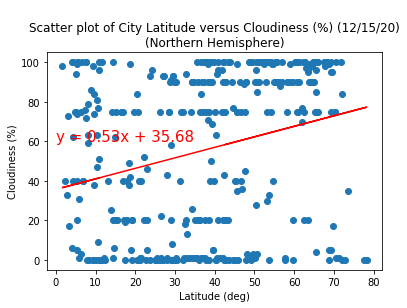

<Figure size 432x288 with 0 Axes>

In [612]:
## Convert to floats and store Latitude and Cloudiness as x and y values
NorLat_Cld_plt_df = clean_city_data.loc[clean_city_data['Lat'] >= 0,['Lat','Cloudiness']]
x_values = NorLat_Cld_plt_df['Lat'].astype('float')
y_values = NorLat_Cld_plt_df ['Cloudiness'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot Title
plt.title('\nScatter plot of City Latitude versus Cloudiness (%) (12/15/20)\n(Northern Hemisphere)')

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R-Squared: {rvalue**2}")

# Show plot
plt.show()

# Output png
plt.savefig("../output_data/LatitudevsCloudiness_North.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Southern Hemisphere (Latitude vs Cloudiness): Plot shows weak correlation between both parameters or variables. However, it's comparatively more cloudy around the tropics than the lower Southern hemisphere.

R-Squared: 0.0948428613550089


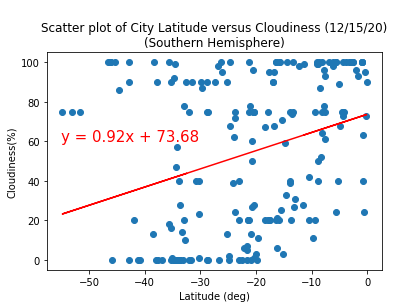

<Figure size 432x288 with 0 Axes>

In [621]:
## Convert to floats and store Latitude and Cloudiness as x and y values respectively
SouLat_Cld_plt_df = clean_city_data.loc[clean_city_data['Lat'] < 0,['Lat','Cloudiness']]
x_values = SouLat_Cld_plt_df['Lat'].astype('float')
y_values = SouLat_Cld_plt_df ['Cloudiness'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (deg)')
plt.ylabel('Cloudiness(%)')

# Plot Title
plt.title('\nScatter plot of City Latitude versus Cloudiness (12/15/20)\n(Southern Hemisphere)')

# Print r square value
print(f"R-Squared: {rvalue**2}")

# Show plot
plt.show()

# Output png
plt.savefig("../output_data/LatitudevsCloudiness_South.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Northern Hemisphere (Latitude vs Wind Speed): R-Squared value shows weak correlation between both variables, so not much relationship between latitude and wind speed. Wind speed appears to be about same in Northern hemisphere.

R-Squared: 0.02049835403959853


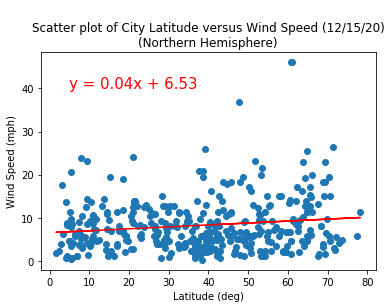

<Figure size 432x288 with 0 Axes>

In [620]:
## Convert to floats and store Latitude and Wind Speed as x and y values respectively
NorLat_WS_plt_df = clean_city_data.loc[clean_city_data['Lat'] >= 0,['Lat','Wind Speed']]
x_values = NorLat_WS_plt_df['Lat'].astype('float')
y_values = NorLat_WS_plt_df ['Wind Speed'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')

# Plot Title
plt.title('\nScatter plot of City Latitude versus Wind Speed (12/15/20)\n(Northern Hemisphere)')

# Print r square value
print(f"R-Squared: {rvalue**2}")

# Show plot
plt.show()

# Output png
plt.savefig("../output_data/LatitudevsWind_Speed_North.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Southern Hemisphere (Latitude vs Wind Speed): Weak correlation between both parameters. Higher wind speeeds in the Southern hemisphere as compared to the Northern hemisphere, but no strong relationship between latitude and wind speed.

R-Squared: 0.046046810773378494


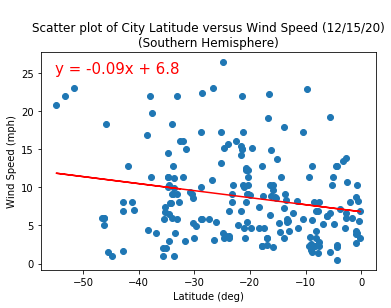

<Figure size 432x288 with 0 Axes>

In [619]:
## Convert to floats and store Latitude and Wind Speed as x and y values respectively
SouLat_WS_plt_df = clean_city_data.loc[clean_city_data['Lat'] < 0,['Lat','Wind Speed']]
x_values = SouLat_WS_plt_df['Lat'].astype('float')
y_values = SouLat_WS_plt_df ['Wind Speed'].astype('float')
# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (deg)')
plt.ylabel('Wind Speed (mph)')

# Plot Title
plt.title('\nScatter plot of City Latitude versus Wind Speed (12/15/20)\n(Southern Hemisphere)')

# Print r square value
print(f"R-Squared: {rvalue**2}")

# Show plot
plt.show()

# Output png
plt.savefig("../output_data/LatitudevsWind_Speed_South.png")